In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from scipy.fft import fft,fftfreq
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

In [95]:
data1 = pd.read_csv("Dataset/Train/Voltage_L1_DataSet1.csv")
out1 = pd.read_csv("Dataset/Train/OutputFor_DataSet1.csv")
data2 = pd.read_csv("Dataset/Test/Voltage_L1_DataSet2.csv")
out2 = pd.read_csv("Dataset/Test/OutputFor_DataSet2.csv")
print(tf.__version__)

2.4.1


In [96]:
print("data1",data1.shape)
print("out1",out1.shape)
print("data2",data2.shape)
print("out2",out2.shape)

data1 (11899, 128)
out1 (5999, 1)
data2 (5999, 128)
out2 (5999, 1)


In [97]:
data1.dropna(axis=0,inplace=True)

In [98]:
data1.shape

(5999, 128)

In [99]:
header =[]
for i in range(1,data1.shape[1]+1):
    header.append("Col"+str(i))

In [100]:
data1.columns = header
data2.columns = header

In [101]:
data1.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col119,Col120,Col121,Col122,Col123,Col124,Col125,Col126,Col127,Col128
0,-797.962914,-1320.199586,-1828.741445,-2319.935857,-2789.218649,-3231.111864,-3641.962908,-4018.119193,-4355.929647,-4650.829055,...,4008.077109,3632.834002,3221.982426,2780.090228,2311.720161,1821.438861,1311.983509,790.659456,262.031836,-269.335205
1,4387.885674,4567.747164,4693.741356,4776.824895,4824.300958,4850.777519,4862.646175,4867.211521,4866.298624,4858.081691,...,-850.916937,-165.252287,524.062959,1199.684611,1842.437384,2437.714882,2972.733259,3437.450839,3828.215741,4143.201102
2,-4050.074299,-4340.408587,-4576.875995,-4769.518913,-4918.338175,-5025.159834,-5100.026323,-5141.111052,-5153.892968,-5137.458861,...,1161.338395,563.322919,-47.475988,-656.447463,-1252.637741,-1825.089177,-2364.673580,-2861.346591,-3309.630078,-3706.785897
3,3458.450134,3686.700705,4000.773209,4392.451258,4834.343975,5269.845213,5636.871457,5876.078192,5950.944421,5841.384319,...,-1450.758930,-722.183210,67.562203,850.005032,1561.232918,2152.858410,2601.141643,2912.474970,3123.378574,3286.805684
4,-910.262100,-312.245917,298.552078,896.568469,1462.629392,1978.474763,2439.540162,2847.652177,3212.852886,3547.924521,...,-4805.126485,-4506.574476,-4196.154858,-3881.168803,-3560.705563,-3225.633496,-2860.433401,-2452.321914,-1991.255895,-1474.497200


In [102]:
data2.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col119,Col120,Col121,Col122,Col123,Col124,Col125,Col126,Col127,Col128
0,-4918.927835,-4668.999112,-4375.127119,-4034.564431,-3659.213495,-3247.243211,-2804.145676,-2333.584172,-1841.965323,-1332.037736,...,-4663.506099,-4918.012016,-5121.251501,-5275.969344,-5381.249941,-5433.432863,-5434.348878,-5382.165656,-5278.715575,-5123.997634
1,2920.413836,2376.612648,1773.304349,1123.306756,444.013104,-248.097664,-933.799415,-1594.783666,-2213.654301,-2776.681104,...,4871.323226,4852.098262,4814.562485,4748.647181,4645.197563,4492.310731,4274.423564,3991.537412,3633.580485,3201.469277
2,-2808.723170,-2303.372710,-1758.656432,-1180.066319,-579.504820,32.957795,643.590017,1241.404644,1815.417600,2356.471851,...,-5151.462319,-5106.602976,-5027.871511,-4914.350757,-4759.632168,-4565.548254,-4319.281944,-4020.831887,-3671.114971,-3265.552744
3,2871.892861,2532.245964,2055.275298,1435.488878,704.927781,-86.971408,-871.546088,-1584.713275,-2177.034698,-2625.625239,...,5858.221546,5590.898767,5202.730284,4759.633062,4322.945050,3943.932165,3647.312850,3432.172965,3265.553468,3098.018896
4,5534.138053,5395.898976,5186.251418,4924.421624,4631.464792,4323.859863,4009.847091,3692.171624,3363.511349,3012.878248,...,3558.510431,3879.847783,4193.860201,4506.042306,4808.154800,5085.548312,5318.082271,5487.448225,5576.250464,5574.419599


In [103]:
data = data1.append(data2, ignore_index = True)
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col119,Col120,Col121,Col122,Col123,Col124,Col125,Col126,Col127,Col128
0,-797.962914,-1320.199586,-1828.741445,-2319.935857,-2789.218649,-3231.111864,-3641.962908,-4018.119193,-4355.929647,-4650.829055,...,4008.077109,3632.834002,3221.982426,2780.090228,2311.720161,1821.438861,1311.983509,790.659456,262.031836,-269.335205
1,4387.885674,4567.747164,4693.741356,4776.824895,4824.300958,4850.777519,4862.646175,4867.211521,4866.298624,4858.081691,...,-850.916937,-165.252287,524.062959,1199.684611,1842.437384,2437.714882,2972.733259,3437.450839,3828.215741,4143.201102
2,-4050.074299,-4340.408587,-4576.875995,-4769.518913,-4918.338175,-5025.159834,-5100.026323,-5141.111052,-5153.892968,-5137.458861,...,1161.338395,563.322919,-47.475988,-656.447463,-1252.637741,-1825.089177,-2364.673580,-2861.346591,-3309.630078,-3706.785897
3,3458.450134,3686.700705,4000.773209,4392.451258,4834.343975,5269.845213,5636.871457,5876.078192,5950.944421,5841.384319,...,-1450.758930,-722.183210,67.562203,850.005032,1561.232918,2152.858410,2601.141643,2912.474970,3123.378574,3286.805684
4,-910.262100,-312.245917,298.552078,896.568469,1462.629392,1978.474763,2439.540162,2847.652177,3212.852886,3547.924521,...,-4805.126485,-4506.574476,-4196.154858,-3881.168803,-3560.705563,-3225.633496,-2860.433401,-2452.321914,-1991.255895,-1474.497200


In [104]:
data.shape

(11998, 128)

In [105]:
header = ["output"]
out1.columns = header
out2.columns = header

In [106]:
out2.head()

,output
0,1
1,2
2,2
3,3
4,3


In [107]:
output = out1.append(out2, ignore_index = True)
output.head()

,output
0,1
1,2
2,2
3,3
4,3


In [108]:
output.shape

(11998, 1)

In [109]:
data['output'] = output

In [110]:
data.head(10)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col120,Col121,Col122,Col123,Col124,Col125,Col126,Col127,Col128,output
0,-797.962914,-1320.199586,-1828.741445,-2319.935857,-2789.218649,-3231.111864,-3641.962908,-4018.119193,-4355.929647,-4650.829055,...,3632.834002,3221.982426,2780.090228,2311.720161,1821.438861,1311.983509,790.659456,262.031836,-269.335205,1
1,4387.885674,4567.747164,4693.741356,4776.824895,4824.300958,4850.777519,4862.646175,4867.211521,4866.298624,4858.081691,...,-165.252287,524.062959,1199.684611,1842.437384,2437.714882,2972.733259,3437.450839,3828.215741,4143.201102,2
2,-4050.074299,-4340.408587,-4576.875995,-4769.518913,-4918.338175,-5025.159834,-5100.026323,-5141.111052,-5153.892968,-5137.458861,...,563.322919,-47.475988,-656.447463,-1252.637741,-1825.089177,-2364.673580,-2861.346591,-3309.630078,-3706.785897,2
3,3458.450134,3686.700705,4000.773209,4392.451258,4834.343975,5269.845213,5636.871457,5876.078192,5950.944421,5841.384319,...,-722.183210,67.562203,850.005032,1561.232918,2152.858410,2601.141643,2912.474970,3123.378574,3286.805684,3
4,-910.262100,-312.245917,298.552078,896.568469,1462.629392,1978.474763,2439.540162,2847.652177,3212.852886,3547.924521,...,-4506.574476,-4196.154858,-3881.168803,-3560.705563,-3225.633496,-2860.433401,-2452.321914,-1991.255895,-1474.497200,3
5,-4594.223200,-4926.555558,-5233.324082,-5483.486096,-5643.261375,-5695.302944,-5630.480201,-5457.922577,-5201.369047,-4890.948453,...,-1329.329215,-1884.435030,-2359.195282,-2757.264233,-3090.509273,-3384.496268,-3663.874920,-3956.035149,-4267.368825,3
6,5332.842238,5273.497333,5100.940030,4877.255061,4615.223612,4295.672600,3995.294738,3606.356433,3191.853852,2763.656223,...,4017.207639,4376.016337,4585.094217,4900.992449,5100.027290,5220.542981,5275.322883,5319.147210,5331.929071,4
7,4020.859066,4325.801763,4639.874267,4920.166132,5104.592423,5234.238154,5289.930882,5320.060271,5351.102427,5332.842477,...,-1.825017,224.598463,781.529918,1286.419463,1815.960852,2286.156122,2770.959735,3254.850792,3620.964238,4
8,-4496.823113,-4168.402246,-3796.432595,-3414.018496,-2951.505939,-2487.042658,-2006.970883,-1491.608702,-976.449256,-454.539885,...,-5243.943774,-5374.791777,-5448.008769,-5470.253757,-5419.366223,-5332.988391,-5218.444154,-5022.506278,-4786.895330,5
9,-4066.622510,-4127.318967,-4150.225510,-3787.101159,-3380.152105,-2941.449757,-2475.703594,-1980.430440,-1471.240033,-948.507923,...,-5097.487906,-5274.432337,-5276.266561,-5434.461385,-5464.058586,-5435.849212,-5344.646009,-5201.335424,-5013.559614,5


In [111]:
from sklearn.model_selection import train_test_split

In [112]:
data_arr = data.to_numpy()

In [113]:
data_arr.shape

(11998, 129)

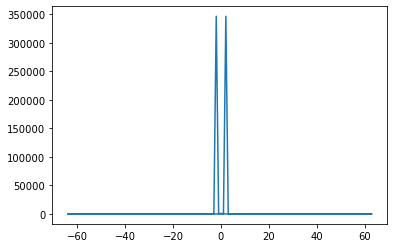

class 1.0


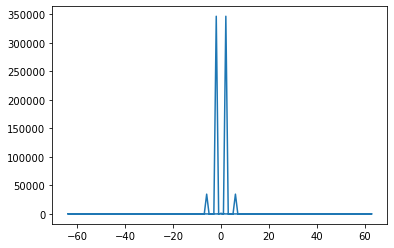

class 2.0


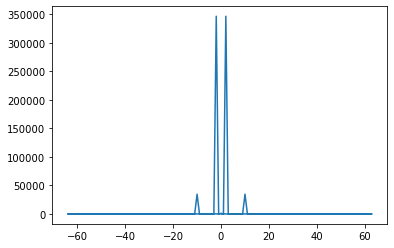

class 3.0


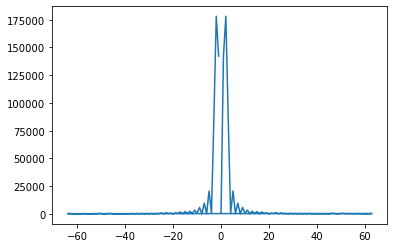

class 4.0


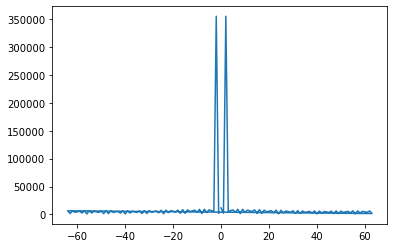

class 5.0


In [114]:
yf = fft(data_arr[0][0:128])
xf = fftfreq(128,1/128)
plt.plot(xf, np.abs(yf))
plt.show()
print("class",data_arr[0][128])

yf = fft(data_arr[1][0:128])
xf = fftfreq(128,1/128)
plt.plot(xf, np.abs(yf))
plt.show()
print("class",data_arr[1][128])

yf = fft(data_arr[3][0:128])
xf = fftfreq(128,1/128)
plt.plot(xf, np.abs(yf))
plt.show()
print("class",data_arr[3][128])

yf = fft(data_arr[6][0:128])
xf = fftfreq(128,1/128)
plt.plot(xf, np.abs(yf))
plt.show()
print("class",data_arr[6][128])

yf = fft(data_arr[8][0:128])
xf = fftfreq(128,1/128)
plt.plot(xf, np.abs(yf))
plt.show()
print("class",data_arr[8][128])

In [115]:
for i in range(0,data_arr.shape[0]):
    data_arr[i][0:128] = fft(data_arr[i][0:128])
    

<ipython-input-115-f8b3a119ce77>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  data_arr[i][0:128] = fft(data_arr[i][0:128])


In [116]:
x_train, x_test, y_train, y_test = train_test_split(data.loc[:,data.columns != 'output'],data['output'],test_size=0.2)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)


In [117]:
print('x_train',x_train.shape)
print('y_train',y_train.shape)
print('x_val',x_val.shape)
print('y_val',y_val.shape)
print('x_test',x_test.shape)
print('y_test',y_test.shape)

x_train (7198, 128)
y_train (7198,)
x_val (2400, 128)
y_val (2400,)
x_test (2400, 128)
y_test (2400,)


In [118]:
x_train.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col119,Col120,Col121,Col122,Col123,Col124,Col125,Col126,Col127,Col128
5529,2811.826534,3282.528160,3724.423324,4137.749748,4499.134737,4829.905181,5103.397888,5335.206486,5510.956897,5637.489390,...,-2578.279635,-2067.194005,-1532.582981,-989.375877,-435.708758,133.242640,1595.108591,1420.600187,1871.459763,2304.897919
10278,-2759.102263,-2272.467398,-1804.792333,-1288.363957,-762.003015,-266.340114,60.491057,0.000610,36.114759,46.948304,...,-5301.522230,-5328.608302,-5291.591068,-5223.877268,-5057.752983,-4850.098030,-4618.969659,-4321.932045,-4061.008992,-3704.384515
7892,-5681.612359,-5532.378043,-5325.209959,-5067.708361,-4768.135632,-4418.454575,-4019.355606,-3589.872076,-3122.011676,-2625.781002,...,-4198.793560,-4580.905355,-4906.162672,-5194.886026,-5424.338993,-5603.841690,-5730.829298,-5804.548493,-5821.042610,-5775.067127
5190,173.962131,174.979382,175.996549,174.979434,172.944458,166.841008,159.719415,151.580890,140.389980,130.217050,...,1390.674522,1960.372971,2463.945999,2956.328664,3436.502716,3840.377927,4233.063285,4614.557373,4928.908628,5201.550680
11641,2322.468680,1768.792354,1181.672921,573.185839,-48.306773,-667.012480,-1274.570120,-1857.045289,-2405.147800,-2910.516593,...,5165.170922,5086.206253,4970.083160,4814.012886,4616.138806,4366.241213,4063.390998,3707.589689,3296.976826,2833.412392


In [119]:
x_test.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col119,Col120,Col121,Col122,Col123,Col124,Col125,Col126,Col127,Col128
7035,-4069.397887,-3686.555457,-3269.287898,-2802.991646,-2277.235169,-1686.801974,-1040.037921,-356.763073,341.116790,1024.391719,...,-6269.438827,-6370.626143,-6370.625838,-6267.352218,-6073.322895,-5807.315311,-5490.192840,-5149.076291,-4794.399419,-4434.506217
9190,-5905.259692,-5650.318135,-5343.107635,-4984.696007,-4575.083004,-4124.934388,-3633.184918,-3107.300996,-2551.549361,-1971.264535,...,-5196.970173,-5527.647386,-5807.123285,-6026.863776,-6191.135582,-6294.606376,-6337.274102,-6320.206676,-6242.337571,-6103.666503
11458,-446.663238,-998.311886,-1540.416991,-2067.250909,-2574.041604,-3056.973745,-3509.363581,-3929.303873,-4311.067011,-4649.883098,...,4443.731430,4077.237862,3674.477346,3234.494514,2763.970838,2266.723011,1747.524603,1211.146122,663.314707,108.803173
5087,-2046.786634,-1499.927132,-940.281939,-370.800989,202.614129,773.078032,1336.657395,1886.466808,2418.572651,2927.072367,...,-5627.924688,-5445.967011,-5209.912867,-4928.614752,-4598.139075,-4219.467923,-3804.406042,-3351.969036,-2866.090919,-2353.656334
6602,-4201.066433,-3886.422865,-3657.238464,-3480.495247,-3303.751158,-3064.855673,-2704.569274,-2200.557802,-1543.109389,-768.155561,...,-5157.619827,-5620.844203,-6011.234402,-6266.638986,-6346.271219,-6229.736722,-5947.140659,-5535.385466,-5065.363003,-4602.139076


In [120]:
y_train.head()

5529     5
10278    4
7892     5
5190     4
11641    2
Name: output, dtype: int64

In [121]:
y_test.head()

7035     3
9190     1
11458    1
5087     1
6602     3
Name: output, dtype: int64

In [122]:
y_train_hot = pd.get_dummies(y_train)
y_test_hot = pd.get_dummies(y_test)
y_val_hot = pd.get_dummies(y_val)

In [123]:
y_train_arr = y_train_hot.to_numpy()
y_test_arr = y_test_hot.to_numpy()
y_val_arr = y_val_hot.to_numpy()
print("y_train:",y_train_arr.shape)
print("y_test:",y_test_arr.shape)
print("y_val:",y_val_arr.shape)

y_train: (7198, 5)
y_test: (2400, 5)
y_val: (2400, 5)


In [124]:
y_train_hot.head()

,1,2,3,4,5
5529,0,0,0,0,1
10278,0,0,0,1,0
7892,0,0,0,0,1
5190,0,0,0,1,0
11641,0,1,0,0,0


In [125]:
transform = StandardScaler()
x_train_tr = transform.fit_transform(x_train)
x_test_tr = transform.fit_transform(x_test)
x_val_tr = transform.fit_transform(x_val)

In [126]:
print("Training",x_train_tr.shape)
print(y_train_arr.shape)
print("Validation",x_val_tr.shape)
print(y_val_arr.shape)
print("Test",x_test_tr.shape)
print(y_test_arr.shape)

Training (7198, 128)
(7198, 5)
Validation (2400, 128)
(2400, 5)
Test (2400, 128)
(2400, 5)


In [146]:
model = Sequential()

model.add(Dense(64, input_shape=(128,), activation = 'relu'))

#model.add(Dense(64, activation = 'relu'))
#model.add(Dense(64, activation = 'relu'))
#model.add(Dropout(0.6))

#model.add(Dense(64, activation = 'relu'))
#model.add(Dropout(0.6))

#model.add(Dense(32, activation = 'relu'))
#model.add(Dropout(0.5))

model.add(Dense(5, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [147]:
history = model.fit(x_train_tr, y_train_arr, batch_size=64, epochs=30, validation_data=(x_val_tr, y_val_arr))


Epoch 1/30
113/113 [==============================] - 1s 3ms/step - loss: 1.5235 - accuracy: 0.3060 - val_loss: 1.2308 - val_accuracy: 0.4483
Epoch 2/30
113/113 [==============================] - 0s 2ms/step - loss: 1.2019 - accuracy: 0.4669 - val_loss: 1.1330 - val_accuracy: 0.4675
Epoch 3/30
113/113 [==============================] - 0s 2ms/step - loss: 1.1232 - accuracy: 0.4900 - val_loss: 1.0864 - val_accuracy: 0.5063
Epoch 4/30
113/113 [==============================] - 0s 2ms/step - loss: 1.0798 - accuracy: 0.5406 - val_loss: 1.0300 - val_accuracy: 0.5517
Epoch 5/30
113/113 [==============================] - 0s 2ms/step - loss: 1.0239 - accuracy: 0.5934 - val_loss: 0.9796 - val_accuracy: 0.6458
Epoch 6/30
113/113 [==============================] - 0s 2ms/step - loss: 0.9659 - accuracy: 0.6566 - val_loss: 0.9379 - val_accuracy: 0.6246
Epoch 7/30
113/113 [==============================] - 0s 2ms/step - loss: 0.8943 - accuracy: 0.6926 - val_loss: 0.8320 - val_accuracy: 0.7942
Epoch 

In [148]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_23 (Dense)             (None, 5)                 325       
Total params: 8,581
Trainable params: 8,581
Non-trainable params: 0
_________________________________________________________________


In [149]:
print(model.metrics_names)

['loss', 'accuracy']


In [150]:
pred_acc = model.evaluate(x_test_tr,y_test_arr)
print("Test accuracy is {}".format(pred_acc))

75/75 [==============================] - 0s 2ms/step - loss: 0.1373 - accuracy: 0.9887
Test accuracy is [0.13733598589897156, 0.9887499809265137]


In [151]:
d = x_test.to_numpy()
for i in range(0,5):
    print((model.predict(d))[i])

[0. 0. 1. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0.]


In [133]:
model.save('model.h5')